# 範例
## 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

W0715 22:33:27.918334  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0715 22:33:28.301346  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 22:33:28.306300  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0715 22:33:35.651917  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 22:33:35.697797  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=32,
                         verbose=1)

W0715 22:33:36.375967  4928 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 22:33:36.438798  4928 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 221us/step - loss: 0.2700 - acc: 0.9223 - val_loss: 0.1332 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 9s 179us/step - loss: 0.1080 - acc: 0.9682 - val_loss: 0.1060 - val_acc: 0.9682
Epoch 3/10
48000/48000 [==============================] - 8s 177us/step - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0945 - val_acc: 0.9711
Epoch 4/10
48000/48000 [==============================] - 9s 186us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0803 - val_acc: 0.9754
Epoch 5/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0372 - acc: 0.9884 - val_loss: 0.0841 - val_acc: 0.9752
Epoch 6/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.0257 - acc: 0.9920 - val_loss: 0.0772 - val_acc: 0.9780
Epoch 7/10
48000/48000 [==============================] - 9s 179us/step - loss: 0.0200 - acc: 0.9941 - val_loss: 0.0881 -

## 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

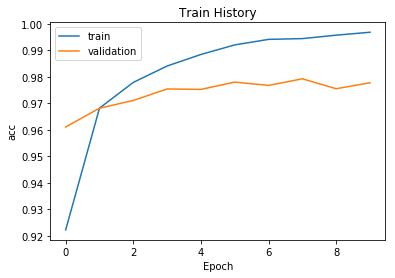

In [14]:
show_train_history(train_history,'acc','val_acc')

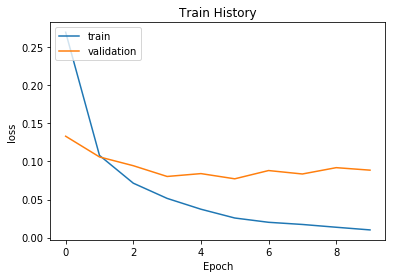

In [15]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確度

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('\n accuracy', scores[1])

10000/10000 [==============================] - 1s 69us/step

 accuracy 0.9785


# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異


model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [17]:
#建立模型
model2 = Sequential()
#建構輸入層
model2.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model2.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

model2.add(Dense(units=56, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model2.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 56)                7224      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                570       
Total params: 241,650
Trainable params: 241,650
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

In [18]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [19]:
train_history = model2.fit(x=x_Train_normalize,
                           y=y_Train_OneHot,
                           validation_split=0.2,
                           epochs=10,
                           batch_size=32,
                           verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.2864 - acc: 0.9151 - val_loss: 0.1753 - val_acc: 0.9468
Epoch 2/10
48000/48000 [==============================] - 11s 223us/step - loss: 0.1087 - acc: 0.9666 - val_loss: 0.1064 - val_acc: 0.9673
Epoch 3/10
48000/48000 [==============================] - 11s 222us/step - loss: 0.0737 - acc: 0.9770 - val_loss: 0.0857 - val_acc: 0.9739
Epoch 4/10
48000/48000 [==============================] - 11s 222us/step - loss: 0.0543 - acc: 0.9827 - val_loss: 0.0925 - val_acc: 0.9734
Epoch 5/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0433 - acc: 0.9865 - val_loss: 0.1150 - val_acc: 0.9682
Epoch 6/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0355 - acc: 0.9886 - val_loss: 0.1055 - val_acc: 0.9721
Epoch 7/10
48000/48000 [==============================] - 10s 218us/step - loss: 0.0300 - acc: 0.9904 - val_loss: 0.

## 以圖形顯示訓練過程

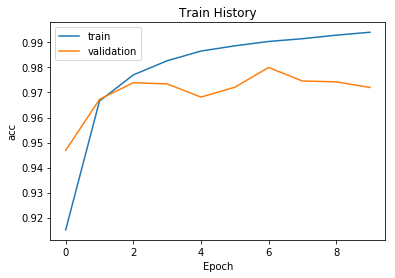

In [20]:
show_train_history(train_history,'acc','val_acc')

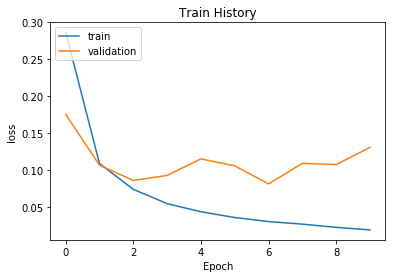

In [21]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [22]:
scores = model2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 64us/step

accuracy= 0.9739


# Test

In [23]:
#建立模型
model3 = Sequential()
#建構輸入層
model3.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model3.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

# model2.add(Dense(units=56, 
#                 kernel_initializer='normal', 
#                 activation='relu'))

#建構輸出層
model3.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [25]:
train_history = model3.fit(x=x_Train_normalize,
                           y=y_Train_OneHot,
                           validation_split=0.2,
                           epochs=10,
                           batch_size=32,
                           verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 227us/step - loss: 0.2583 - acc: 0.9248 - val_loss: 0.1323 - val_acc: 0.9608
Epoch 2/10
48000/48000 [==============================] - 11s 219us/step - loss: 0.1002 - acc: 0.9688 - val_loss: 0.0955 - val_acc: 0.9698
Epoch 3/10
48000/48000 [==============================] - 10s 205us/step - loss: 0.0652 - acc: 0.9798 - val_loss: 0.0928 - val_acc: 0.9727
Epoch 4/10
48000/48000 [==============================] - 10s 212us/step - loss: 0.0494 - acc: 0.9839 - val_loss: 0.0941 - val_acc: 0.9726
Epoch 5/10
48000/48000 [==============================] - 10s 213us/step - loss: 0.0368 - acc: 0.9883 - val_loss: 0.0951 - val_acc: 0.9743
Epoch 6/10
48000/48000 [==============================] - 10s 209us/step - loss: 0.0278 - acc: 0.9905 - val_loss: 0.1092 - val_acc: 0.9704
Epoch 7/10
48000/48000 [==============================] - 10s 213us/step - loss: 0.0237 - acc: 0.9919 - val_loss: 0.

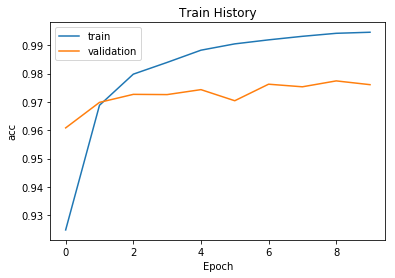

In [26]:
show_train_history(train_history,'acc','val_acc')

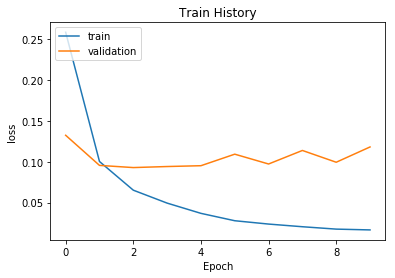

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model3.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 84us/step

accuracy= 0.9783
